In [2]:
import pandas as pd
import numpy as np
from scipy import stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

## Треугольное распределение

In [25]:
# Задаем закон распределения
c=0.08889288
rv=sts.triang(c)

Треугольное распределение задается с помощью параметра 'с' (соответствует значению $с$ на приложенном рисунке). Параметры ```loc```=0, ```scale```=1 берутся по умолчанию. Точка $а$ на рис. соответствует значению параметра ```loc```, точка $b$ - ```loc+scale```
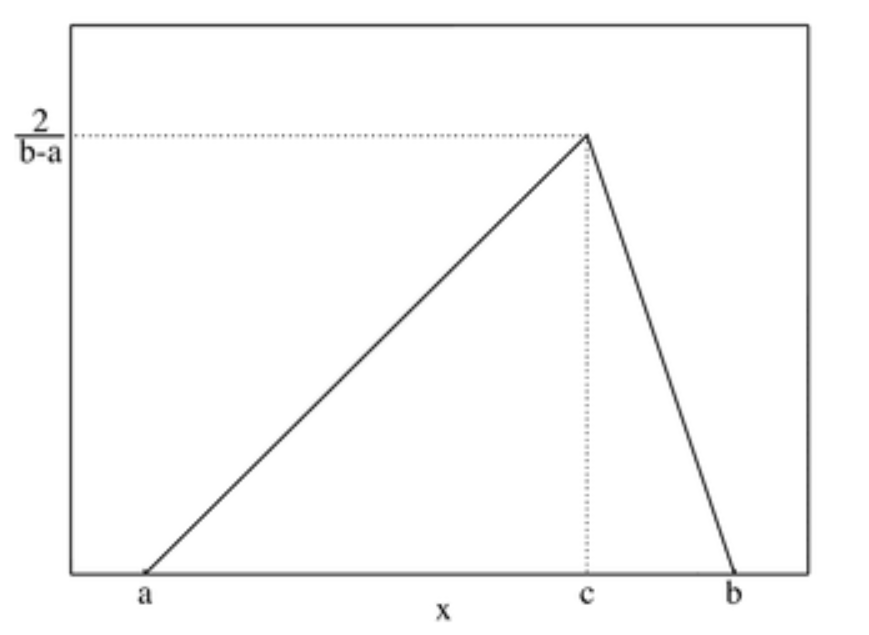

In [26]:
#Генерируем выборку объема 1000 из распределения

sample=rv.rvs(1000)

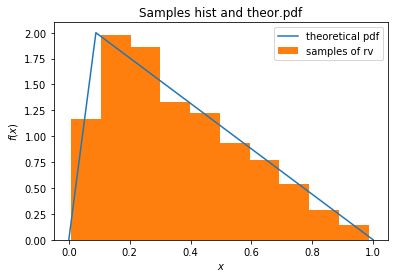

In [27]:
#Строим гистограмму выборки СВ и теоретическую плотность распределения
x=np.linspace(0,1,1000)
pdf = rv.pdf(x)

plt.plot(x, pdf, label='theoretical pdf')
plt.hist(sample, normed=True, label="samples of rv")
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.title('Samples hist and theor.pdf')
plt.legend()

Рассчитаем мат. ожидание и дисперсию исходного распределения. 
Формулы: http://rdostudio.raox.ru/help/help/rdo_lang_rus/html/rdo_theory/rdo_theory_seq_triangular.htm 

Мат.ожидание: $$EX=\frac{a+b+c}3$$
Дисперсия: $$DX=\frac{a^2+b^2+c^2-a \times b-a\times c-b\times c}{18}$$

In [28]:
#Т.к loc=0, scale=1 
a=0
b=1
av=(a+b+c)/3
disp=(a**2+b**2+c**2-a*b-a*c-b*c)/18
print 'Мат.ожидание исходного распределения',av
print 'Дисперсия исходного распределения', disp

Мат.ожидание исходного распределения 0.362964293333
Дисперсия исходного распределения 0.0510560591175


Расчитываем параметры нормальных распределений согласно ЦПТ, которыми аппроксимируются распределения выборочных средних.
Матожидание нормального распределения совпадает c матожиданием исходной СВ ```av``` при любом $n$: $EX(norm)=EX$. 

Дисперсия нормального распределения: $$DX(norm)=\frac{DX}n,$$
где $DX$ - дисперсия исходной СВ, $n$ - кол-во выборок по которому рассчитывается выборочное среднее $\overline{X_n}$

In [29]:
# выбираем 4 значения n
n=[3,10,25,45]

av_norm=av
# рассчитаем значение дисперсии для каждого n и запишем в dict
disp_norm=dict()
for ni in n:
    disp_norm[ni]=disp/ni

print 'матожидание нормального распределения:',av_norm    
print 'дисперсия нормального распределения для каждого n:',disp_norm

матожидание нормального распределения: 0.362964293333
дисперсия нормального распределения для каждого n: {25: 0.0020422423646993208, 10: 0.005105605911748303, 3: 0.017018686372494343, 45: 0.0011345790914996227}


In [30]:
# Генерируем выборок объема n и рассчитываем выборочное среднее 1000 раз
dav=dict()
for ni in n:
    avi=list()
    for i in range(1000):
        sample_i=rv.rvs(ni)
        avi.append(sum(sample_i)/len(sample_i))
# Запишем значение выборочных средних в dict
    dav[ni]=avi

Построим гистограммы распределений выборочных средних и плотности аппроксимирующих нормальных распределений для каждого $n$

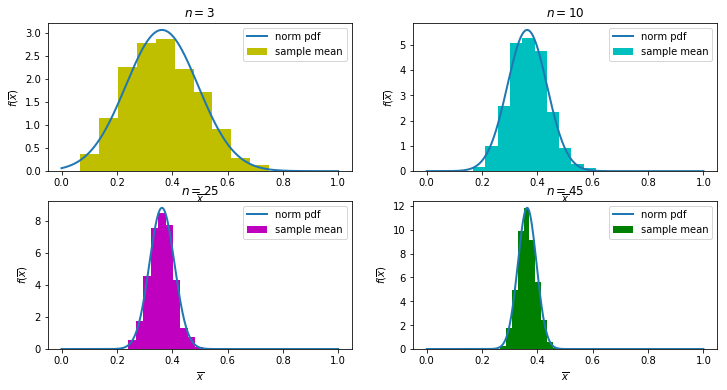

In [32]:
x=np.linspace(0,1,1000)
clrs = iter(['y', 'c', 'm','g'])
pi=0
plt.figure(figsize=(12,6))
for ni in n:
    pi+=1
    
    plt.subplot(2,2,pi)
# на вход норм распределения scipy.stats.norm() в качестве параметра scale подаем среднеквадратичное отклонение равное sqrt(DX/n)
    plt.plot(x,sts.norm(loc=av_norm, scale=np.sqrt(disp_norm[ni])).pdf(x), label="norm pdf", linewidth='2')
    plt.hist(dav[ni],normed=True, label="sample mean",color=next(clrs))
    plt.ylabel(r'$f(\overline{x})$')
    plt.xlabel(r'$\overline{x}$')
    plt.title('$n=%s$' % ni)
    plt.legend()

## Выводы
1) Из полученных графиков видно, что при увеличении $n$ гистограмма распределения концентрируется сильнее вокруг среднего значения исходного расределения.

2) С увеличением $n$ точность аппроксимации распределения выборочного среднего $\overline{X_n}$ нормальным распределением увеличивается.